# Stroop Effect Test Investigation

This jupyter notebook is my submission for the P1 section of the Data Analyst Nanodegree project 'Statistics: The Science of Decisions'. Each section of this notebook corresponds to a question from the [project Instructions page](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True).

### Question 1:
** *What is our independent variable? What is our dependent variable?* **

The independent variable is the word set a participant is given (congruent or incongruent) and the dependent variable is the time it takes a participant in the experiment to name the ink colors in the two equally-sized lists.

### Question 2:
** *What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.* **

An appropriate set of hypotheses that may allow us to make inferences about the population of possible Stroop Effect test takers are:
* Null Hypothesis ($H_0$): The population mean difference in time between the Incongruent and Congruent task (Incongruent task time minus Congruent task time), denoted here as $\mu$, is zero.
* Alternative Hypothesis ($H_1$): $\mu$ is greater than zero.

Intuitively, if the Incongruent task takes longer on average than the Congruent task we would expect $\mu$ to be positive, which is why the following hypothesis test is appropriate:

$$H_0:\mu = 0 \text{ versus } H_1:\mu > 0$$

Because the Stroop Effect test included a repeated measurement with the same participants under two conditions, it seems appropriate to use a dependent t-test for paired samples to evaluate these hypotheses. Specifically, this will be a one-sample (using the difference between Incongruent and Congruent tasks) , one-tailed t-procedure.

The assumptions for the hypothesis test are:

* The population of D is assumed to be normally distributed noting here that "one-sample t-tests are considered "robust" for violations of normal distributions" according to the [Emory University Psychology department notes on Test Assumptions for statistical tests](http://www.psychology.emory.edu/clinical/bliwise/Tutorials/TOM/meanstests/assump.htm). Although later in this notebook a Normal Quantile-Quantile plot and a histogram reveal a couple outliers in the data, the distribution does not appear to be "highly skewed". I maintain that it is still appropriate to use a parameteric test with the t-distribution.
* we also assume that participants were selected at random from the population.
* The sample size here is n=24, which is less than 30 and requires the hypothesis test to follow a t-distribution with $n-1$ degrees of freedom.
* We do not know the population's standard deviation so the unbiased estimator for standard deviation, $\hat{s}$, will be used, which further justifies the use of a t-distribution here.

### Question 3:
** *Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.* **

The following two sub-sections of this notebook contain a data set along with descriptive statistics for each. The first is the 'Udacity data set', which contains twenty four participants' recorded times for both the congruent and incongruent tasks. The second is the 'University of Washington data set' which is a set of grouped data that I captured manually from the last page in the sequence of pages on the UW (University of Washington) Stroop Effect test website. More details on the two data sets and descriptive statistics are provided below.

##### Udacity data set

Within Udacity's project description a [link was provided to a small set of twenty four recorded times](https://drive.google.com/file/d/0B9Yf01UaIbUgQXpYb2NhZ29yX1U/view) for the Stroop Effect test. For each row, the time to complete the Congruent task was provided along side the time to complete the Incongruent task. The below table displays all 24 participants recorded times for both conditions.

In [47]:
# load and display the data with difference calculated
import pandas as pd

stroop = pd.read_csv('supporting-files/stroopdata.csv')

for row in stroop:
    stroop['Difference'] = stroop['Incongruent'] - stroop['Congruent']

stroop

,Congruent,Incongruent,Difference
0,12.079,19.278,7.199
1,16.791,18.741,1.950
2,9.564,21.214,11.650
3,8.630,15.687,7.057
4,14.669,22.803,8.134
5,12.238,20.878,8.640
6,14.692,24.572,9.880
7,8.987,17.394,8.407
8,9.401,20.762,11.361
9,14.480,26.282,11.802


The sample size for this data set is $n=24$.
Let X = time to complete a word set under the Congruent condition
Let Y = time to complete a word set under the Incongruent condition

The sample mean for the incongruent task is calculated by summing all $x_i$ values and dividing by $n$:

$$\bar{x}=\frac{\sum_{i=1}^{n}x_i}{n}$$

In [48]:
# compute the sample mean of the congruent and incongruent task
cong_mean = stroop['Congruent'].mean()
incong_mean = stroop['Incongruent'].mean()
print('Congruent task mean: %s' % cong_mean)
print('Incongruent task mean: %s' % incong_mean)

Congruent task mean: 14.051125000000004
Incongruent task mean: 22.01591666666667


The sample mean of the congruent and incongruent sets are:
$$\bar{x} \approx 14.0511$$
$$\bar{y} \approx 22.0159$$

A measure of dispersion about the mean is also necessary for the hypothesis test. For this, the unbiased estimator for standard deviation will be used because our sample size is less than thirty. The unbiased estimator for standard deviation is calculated by taking the square root of the variance, which is the sum of the squared deviations from the mean divided by n minus 1:
$$\hat{s} = \sqrt{\hat{s}} = \sqrt{\frac{1}{n-1}*\sum_{i=1}^{n}(x_i - \bar x)^2}$$

In [49]:
# compute the unbiased estimator for standard deviation
import statistics as stats
cong_ustdv = stats.stdev(stroop['Congruent'])
incong_ustdv = stats.stdev(stroop['Incongruent'])
print('Congruent task unbiased estimator for standard deviation: %s' % cong_ustdv)
print('Incongruent task unbiased estimator for standard deviation: %s' % incong_ustdv)

Congruent task unbiased estimator for standard deviation: 3.5593579576451955
Incongruent task unbiased estimator for standard deviation: 4.7970571224691385


The unbiased estimator for standard deviation of the congruent and incongruent task is:
$$\hat{s}_x \approx 3.5594$$
$$\hat{s}_y \approx 4.7971$$

##### University of Washington data set

Aside from the data set of 24 participants provided in the project instructions, another set can be uncovered in [the University of Washington's online Stroop test](https://faculty.washington.edu/chudler/java/ready.html). After taking the test, a page is displayed where one can enter one's results from both the Congruent and Incongruent tasks. After doing so a grouped breakdown of all participants' performance up until that point is revealed. When I completed the test I was the 204,083rd person to record a time. I captured the values manually and added them to the below dataframe. The intervals in this grouped data represent the **increase** in time taken to complete the test between the Congruent and Incongruent tasks. Here 'Total' represents the total number of people to have recorded their times (aka, the frequency of each measurement where a measurement is the 'Midpoint').

In [50]:
interval = ['0-5 sec','5-10 sec','10-15 sec','15-20 sec','20-25 sec','25-30 sec','30-35 sec','35-40 sec','More than 40 sec']
grouped_values = [40098,52420,48947,23050,11958,4927,3047,1930,3897]
midpoint = [2.5, 7.5, 12.5, 17.5, 22.5, 27.5, 32.5, 37.5, 42.5]

uw_grouped_data = pd.DataFrame({'Interval':interval,
                               'Midpoint':midpoint,
                               'Total':grouped_values})
uw_grouped_data

,Interval,Midpoint,Total
0,0-5 sec,2.5,40098
1,5-10 sec,7.5,52420
2,10-15 sec,12.5,48947
3,15-20 sec,17.5,23050
4,20-25 sec,22.5,11958
5,25-30 sec,27.5,4927
6,30-35 sec,32.5,3047
7,35-40 sec,37.5,1930
8,More than 40 sec,42.5,3897


Two important notes about the University of Washington data:

I suspect that this grouped data contains inaccuracies. First, a small percentage of people (approximately 7%) claimed that the Incongruent word set took them **less** time to complete than the Congruent set. For the purposes of grouping the data in a similar fashion to the Udacity set I've disregarded such instances. While it may be true that, for a small proportion of the sample, the time to complete the incongruent task was less than the congruent task, I suspect some people are misreporting. The  data from the UW website is compiled from manual user-input (people selecting a radio button to note their times and submitting the result - this instead of the website somehow calculating this for them). People may be just clicking through, or selecting one of the first times they can in order to get to the summary page to see the full summary of all participants' times. 

Second, slightly less than 2% of participants took more than 40 seconds longer to complete the Incongruent set compared to the Congruent. It seems reasonable to group them in a category 'lasting more than 40 sec' given the true nature of the tail of this part of the distribution is unknown.

Overall it seems capturing the grouped data, while interesting, may not be sufficiently accurate to justify using it for a statistical investigation. As an exercise into working with already-grouped data, I'll report some descriptive statistics below:

Let G = the difference in time for someone in completing the Congruent task and the Incongruent task.

In [51]:
# compute the sample size
uw_n = uw_grouped_data['Total'].sum()
print('UW sample size: %s' % uw_n)

UW sample size: 190274


The sample size for this data set is is 190274: $$n_g=190274$$

The sample mean for the grouped data is calculated by summing all $g_j$ (distinct measurements) multiplied by their frequency $t(g_j)$ and dividing by n:
$$\bar{g} = \frac{\sum_{j=1}^{m} (g_j * t(g_j))}{n_g}$$

In [52]:
# prepare UW grouped data frame for computing mean
for row in uw_grouped_data:
    uw_grouped_data['gj*t(gj)'] = uw_grouped_data['Midpoint'] * uw_grouped_data['Total']
uw_grouped_data

,Interval,Midpoint,Total,gj*t(gj)
0,0-5 sec,2.5,40098,100245.0
1,5-10 sec,7.5,52420,393150.0
2,10-15 sec,12.5,48947,611837.5
3,15-20 sec,17.5,23050,403375.0
4,20-25 sec,22.5,11958,269055.0
5,25-30 sec,27.5,4927,135492.5
6,30-35 sec,32.5,3047,99027.5
7,35-40 sec,37.5,1930,72375.0
8,More than 40 sec,42.5,3897,165622.5


In [53]:
# compute the mean
uw_mean = uw_grouped_data['gj*t(gj)'].sum() / uw_grouped_data['Total'].sum()
print("UW sample mean is: %s" % uw_mean)

UW sample mean is: 11.82599829719247


The sample mean time as an increase from congruent to incongruent tasks for the grouped UW set is: $$\bar{g} \approx 11.8260$$

In computing the standard deviation for this grouped data, our sample size is sufficiently large enough that the unbiased estimator for standard deviation is not needed. The standard deviation is calculated by taking the square root of variance, which is the sum of the squared deviation of the measurements ('Midpoints') from the mean, multiplied by their respective frequency and divided by n: 
$$s_g = \sqrt{s_g^2} = \sqrt{\frac{1}{n_g}*(\sum_{j=1}^{m}(g_j - \bar{g})^2} * t(g_j))$$

In [54]:
# prepare UW grouped data for computing the standard deviation
for row in uw_grouped_data:
    uw_grouped_data['dev_calc'] = (uw_grouped_data['Midpoint'] - uw_mean)**2 * uw_grouped_data['Total']
uw_grouped_data

,Interval,Midpoint,Total,gj*t(gj),dev_calc
0,0-5 sec,2.5,40098,100245.0,3.487493e+06
1,5-10 sec,7.5,52420,393150.0,9.810016e+05
2,10-15 sec,12.5,48947,611837.5,2.223556e+04
3,15-20 sec,17.5,23050,403375.0,7.420785e+05
4,20-25 sec,22.5,11958,269055.0,1.362427e+06
5,25-30 sec,27.5,4927,135492.5,1.210437e+06
6,30-35 sec,32.5,3047,99027.5,1.302332e+06
7,35-40 sec,37.5,1930,72375.0,1.272168e+06
8,More than 40 sec,42.5,3897,165622.5,3.666665e+06


In [55]:
# compute standard deviation for the UW set
import math as math

uw_stdv = math.sqrt(uw_grouped_data['dev_calc'].sum() / uw_grouped_data['Total'].sum())
print("UW grouped data standard deviation: %s" % uw_stdv)

UW grouped data standard deviation: 8.592104638868703


The standard deviation for the UW grouped data set is: $$s_g \approx 8.5921$$

### Question 4:
** *Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.* **

For learning and exploration purposes I will visualize both the Udacity and UW data sets, though I intend only on using the Udacity set for my systistical analysis.

##### Udacity data set visualization

Each task, congruent and incongruent, can be grouped in five second bins and plotted in histogram form.

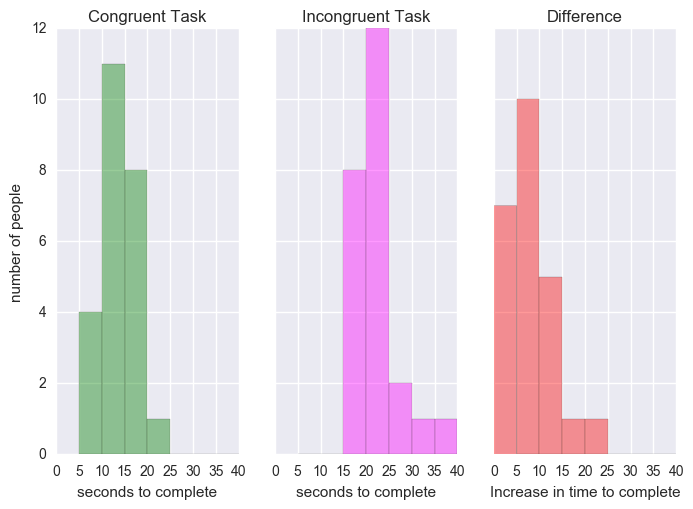

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

cong = stroop['Congruent']
incong = stroop['Incongruent']
diff = stroop['Difference']

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True)

sns.distplot(cong, bins=range(0,45,5), color='green', ax=ax1, kde=False)
ax1.set_title("Congruent Task")
ax1.set_ylabel("number of people")
ax1.set_xlabel("seconds to complete")

sns.distplot(incong, bins=range(0,45,5), color='magenta', ax=ax2, kde=False)
ax2.set_title("Incongruent Task")
ax2.set_xlabel("seconds to complete")

sns.distplot(diff, bins=range(0,45,5), color='red', ax=ax3, kde=False)
ax3.set_title("Difference")
ax3.set_xlabel("Increase in time to complete")

plt.show()

Clearly the Incongruent task is taking longer to complete for most participants. This supports the statistical test I expect to conduct. 

A boxplot with a swarmplot superimposed would also be a helpful way to visualize central tendency.

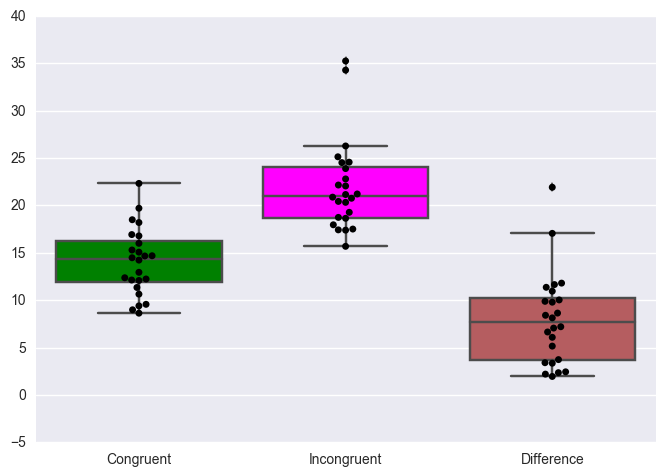

In [57]:
ax = sns.boxplot(data=stroop)
ax = sns.swarmplot(data=stroop, color='.0')

mybox = ax.artists[0]
mybox.set_facecolor('green')

mybox = ax.artists[1]
mybox.set_facecolor('magenta')

plt.show()

Finally, a Normal Quantile-Quantile plot can help visualize whether or not we may consider the population to be normally distributed.

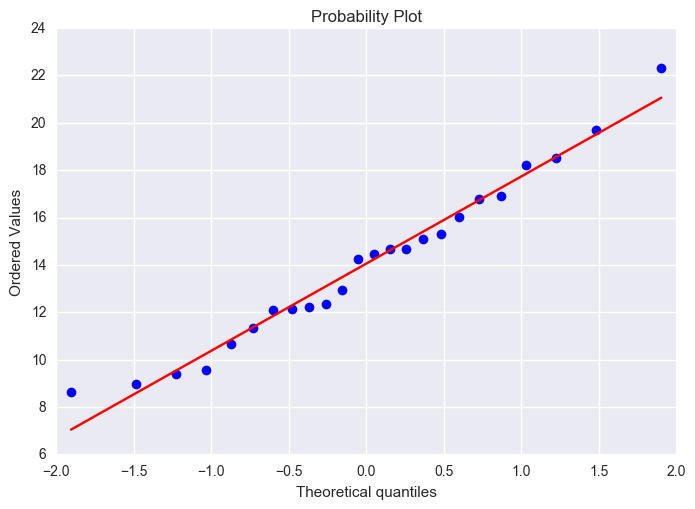

In [58]:
# the Congruent set
from scipy import stats as scistats

res1 = scistats.probplot(stroop['Congruent'], plot=plt)
plt.show()

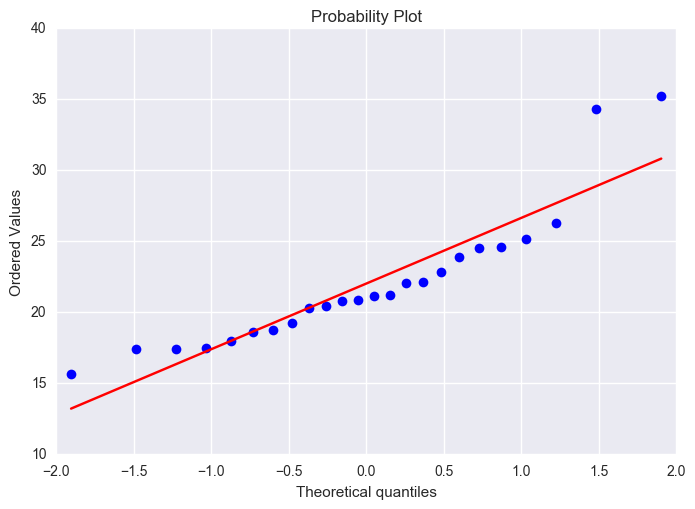

In [59]:
# the Incongruent set
res2 = scistats.probplot(stroop['Incongruent'], plot=plt)
plt.show()

The Incongruent set has a couple of outliers, but it still seems acceptable to consider it as normally distributed:

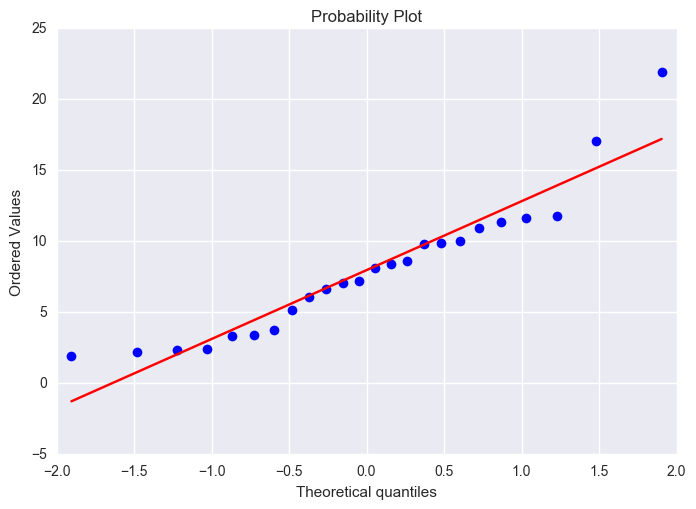

In [60]:
# the Difference
res3 = scistats.probplot(stroop['Difference'], plot=plt)
plt.show()

Again, the two outliers raise concern that the data is not normally distributed, though overall it seems appropriate to assume normal distribution.

##### University of Washington data set visualization

Although the sample sizes are vastly different, I think it would be interesting to plot the UW data set against the Udacity data set. The below dataframe calculates the difference in time between the congruent and incongruent tasks for the Udacity data set (first five rows are displayed).

In [61]:
for row in stroop:
    stroop['Difference'] = abs(stroop['Congruent'] - stroop['Incongruent'])
stroop.head()

,Congruent,Incongruent,Difference
0,12.079,19.278,7.199
1,16.791,18.741,1.950
2,9.564,21.214,11.650
3,8.630,15.687,7.057
4,14.669,22.803,8.134


The below histograms constrain both data sets to bin sizes at five-second intervals. 

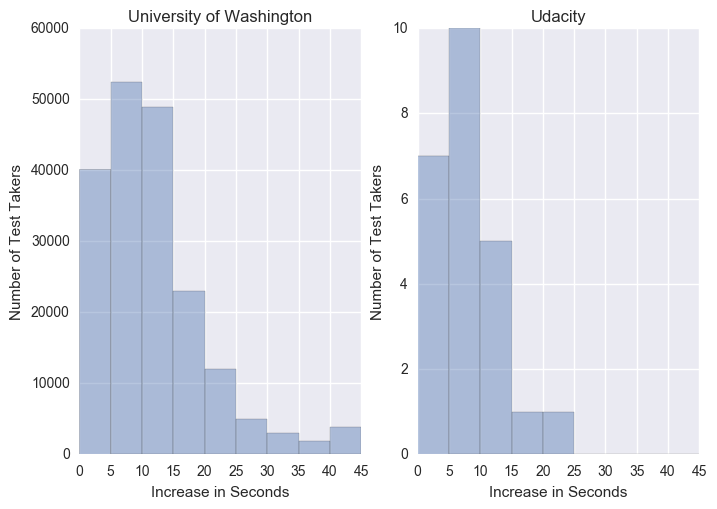

In [62]:
# plot the grouped differences in time for both the University of Washington data and the Udacity data
fig, (ax1,ax2) = plt.subplots(ncols=2, sharey = False)

sns.distplot(midpoint, hist_kws={'weights':uw_grouped_data['Total']}, bins=range(0,50,5), ax=ax1, kde=False)
ax1.set_xlabel("Increase in Seconds")
ax1.set_ylabel("Number of Test Takers")
ax1.set_title("University of Washington")

sns.distplot(stroop['Difference'], bins=range(0,50,5), ax=ax2, kde=False)
ax2.set_xlabel("Increase in Seconds")
ax2.set_ylabel("Number of Test Takers")
ax2.set_title("Udacity")

plt.show()

The two distributions look similar, though I suspect the mean of the UW set is higher given the positive skew of the distribution. Although this is interesting to visualize I don't believe it is appropriate to continue any analysis given the possible inaccuracies of the UW sample and the difference in sample size between the two sets.

### Question 5:
** *Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?* **


The main question addressed with the following procedures are:
* Are we unlikely to observe a increase in time of this size due to chance alone?
* Is there strong evidence that the Incongruent task takes longer on average than the Congruent task?

##### Identify critical values for the sample mean at the $\alpha=0.05$ level 
Let X = the difference in time between the Incongruent and Congruent tasks (Incongruent minus Congruent).

Let $t^*$ = $t_{n-1 \text{ ,} 0.025}$ be the critical t-value

Let $SE(\bar{X})$ = $\frac{\hat{S}}{\sqrt{n}}$

The critical values on the t-distribution are found wherever the following is true:

$$|\bar{X} - \mu| > t^* * SE(\bar{X})$$

Note, $\mu$ is theorized to be zero under the null hypothesis, so:

$$|\bar{X} - 0| > t^* * SE(\bar{X})$$
$$|\bar{X}| > t^* * SE(\bar{X})$$

Noting that at the $\alpha = 0.05$ level, we are interested in the probability of extreme values at either end of the t-distribution with 9 degrees of freedom. This means that each end has a 0.025 probability, which leaves 0.95 in the middle. 

In [63]:
# calculate degrees of freedom
degrees_f = stroop['Difference'].count() - 1
degrees_f

23

In [64]:
# find the critical t-value
t_star = scistats.t.ppf(1-0.025, degrees_f)
t_star

2.0686576104190406

In [65]:
# find the standard error
diff = stroop['Difference']

from scipy import stats as scistats
stderr = scistats.sem(diff, ddof=1)
stderr

0.99302863477834058

In [66]:
# find the mean difference
import numpy as np
mean_diff = np.mean(diff)
mean_diff

7.964791666666667

In [67]:
# find the critical value for the sample mean
lower_critical = -1 * t_star * stderr
upper_critical = t_star * stderr
print("lower critical value: %s" %round(lower_critical,4))
print("upper critical value: %s" %round(upper_critical,4))

lower critical value: -2.0542
upper critical value: 2.0542


Based on this interval at the $\alpha = 0.05$ level and our sample mean value of approximately 7.9648, there already seems to be strong evidence that the Incongruent condition takes longer on average than the Congruent. Constructing a confidence interval for the population mean difference between Incongruent task and Congruent task (Incongruent minus Congruent) should reveal the same.

##### Construct a 95% confidence interval for the population mean
The interval is constructed with the following statement:
$$\bar{X} - \mu \pm t^* * SE(\bar{X})$$

Note, $\mu$ is theorized to be zero under the null hypothesis, so:

$$\bar{X} - 0 \pm t^* * SE(\bar{X})$$
$$\bar{X} \pm t^* * SE(\bar{X})$$

In [68]:
# find the upper and lower bounds for the interval
lower_bound = mean_diff - (t_star * stderr)
upper_bound = mean_diff + (t_star * stderr)
print("lower bound: %s: " %round(lower_bound,4))
print("upper bound: %s: " %round(upper_bound,4))

lower bound: 5.9106: 
upper bound: 10.019: 


So our 95% confidence interval is for $\mu$ is approximately:

$$(5.9106, 10.019)$$

We can be 95% confident that $\mu$, the population mean difference between Incongruent and Congruent tasks, lies somewhere in this interval. In other words, we can be 95% confident that $\mu$, the true mean increase in time to complete the Stroop Effect test when taking it under the Incongruent condition vs. the Congruent condition, lies between 5.9106 and 10.019 seconds. This provides further evidence that on average the Incongruent task is taking longer given that our sample mean value of approximately 7.9648 is within this interval. A hypothesis test at the $\alpha = 0.05$ may help us know for sure whether to accept or reject the null hypothesis.

##### Conduct the Hypothesis test
The hypothesis test is:
$$H_0: \mu=0 \text{ versus} H_1: \mu>0$$

Here, $\mu$ is the population mean difference between Incongruent and Congruent tasks (Incongruent minus Congruent). If $\mu$ is greater than zero with a significance at or below the $\alpha=0.05$ level, then the null hypothesis may be rejected.

To either accept or reject the null hypothesis a test statistic can be plotted on a t-distribution with n-1 degrees of freedom. If it has a p-value greater than the significance level of 0.05 then we will fail to reject the null hypothesis. If it is less than 0.05, then it is statistically significant and will allow us to reject the null hypothesis in favor of the alternative hypothesis. 

The test-statistic is calculated:
$$\text{t-stat}= \frac{\bar{X}-0}{SE(\bar{X})}$$

In [69]:
# calculate the test statistic
t_stat = (mean_diff - 0) / stderr
t_stat

8.020706944109957

In [70]:
# note the one-sided t-value is much less than our test statistic
t_val2 = scistats.t.ppf(1-0.05, degrees_f)
t_val2

1.7138715277470473

In [71]:
# calculate the p-value for the test statistic
p_val = scistats.t.sf(t_stat, degrees_f)
p_val

2.0515002928555891e-08

We know that just by looking at the value for a one-tailed significance of $\alpha = 0.05$ being at approx 1.7139, that it's much lower than our test-statistic. This is evidence enough to reject the null hypothesis.

On a t-distribution with 23 degrees of freedom, the p-value is extremely small at approximately 0.0000000205, and far less that the given significance value of 0.05. This means we have very significant evidence against the null hypothesis at the 5% significance level. There is significant evidence that the population mean is greater than 0. This means there is significant evidence that the Incongruent task takes longer than the Congruent task (with our one-sided p-value of 0.0000000205).

### Question 6:
** *Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!* **

Intuitively I speculate that our brains are trained to recognize words and the pattern of unique words faster (with more priority) than that of colors. I can think of a similar task that would result in a similar effect, which may also provide some additional insights into how our brains behave.

I wonder if a test could be created to compare how fast our brains recognize words vs. objects. The [Rochester Institute of Technology](http://www.rit.edu/) has a page with some theoretical points on [the background of the Stroop Effect](https://www.rit.edu/cla/gssp400/sbackground.html). The most interesting to me is the 'Speed of Processing' model. Essentially, this model claims that word processing is much faster than color processing:

** *"The "Speed of Processing" hypothesis suggests that word processing is much faster than color processing. Thus, in a situation of incongruency between words and colors, when the task is to report the color, the word information arrives at the decision process stage earlier than the color information and results in processing confusion. On the other hand, when the task is to report the word, because the color information lags behind the word information, a decision can be made before the conflicting color information arrives."* **

I speculate that the congruent and incongruent tasks could be tested with a sufficiently large random sample, and compared against a similar test that uses stereotypical objects instead of words. For example, a [rubber ducky](https://img.clipartfest.com/521e9028ec01ceb8ed11bfe48db68b66_rubber-ducky-rubber-ducky_800-800.png) is iconically yellow. A [firetruck](http://images.clipartpanda.com/fire-truck-clipart-niXyyp7iB.gif) is iconically red, etc. Two conditions could be created for the experiment - a congruent and incongruent set. In the Incongruent set the rubber ducky may be blue, and the firetruck may be yellow. The results from the Stroop Effect test using word sets could be compared to the Stroop Effect test using stereotypical objecst. The difference between the two results may point to how quickly our brains process words versus how quickly they process objects.

##### Sources:
Some concepts and methods for the test of hypotheses were inspired by jbstatistics youtube video [An Example of a Paired-Difference t Test and Confidence Interval](https://www.youtube.com/watch?v=upc4zN_-YFM&t=646s)